In [1]:
# environment setup
# this assumes data/ is in the root of the entire project
# so they're one level up from this notebook's location.
import os
import yaml
import torch
from ultralytics import YOLO
from constants import TARGET_BACKGROUND_SIZE, SEED

%cd ..
%pwd  # we need to be in the root of the project so that data/ can be accessed.

c:\Users\hamza\Desktop\realtime-binding-of-isaac-item-detector


c:\Users\hamza\anaconda3\envs\isaac_item_recognizer\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'c:\\Users\\hamza\\Desktop\\realtime-binding-of-isaac-item-detector'

2024-08-07 23:13:11,045 [INFO] __main__: main: Step 1: Clean data/items
2024-08-07 23:13:11,045 [INFO] generate_augmented_items: clean_data_dir: Cleaning data directory: data\items/ ...
Removing files: 100%|██████████| 719/719 [00:00<00:00, 57704.69it/s]
2024-08-07 23:13:11,093 [INFO] generate_augmented_items: clean_data_dir: Done! Removed augmented images from: data\items/
2024-08-07 23:13:11,094 [INFO] __main__: main: Step 2: Download Isaac images from wiki (if needed) then augment images
2024-08-07 23:13:11,104 [INFO] scraping.scraper: fetch_page: Cache hit for url: https://bindingofisaacrebirth.fandom.com/wiki/Items
2024-08-07 23:13:11,487 [INFO] scraping.scraper: parse_isaac_items_from_html: found 719 IsaacItems
2024-08-07 23:13:11,488 [INFO] scraping.scraper: download_item_images: Downloading images, this may take a while...
2024-08-07 23:13:11,527 [INFO] scraping.scraper: download_item_images: Done downloading images!
2024-08-07 23:13:11,540 [INFO] scraping.scraper: dump_item_da

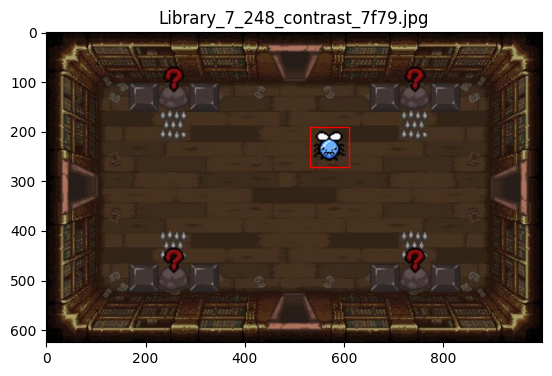

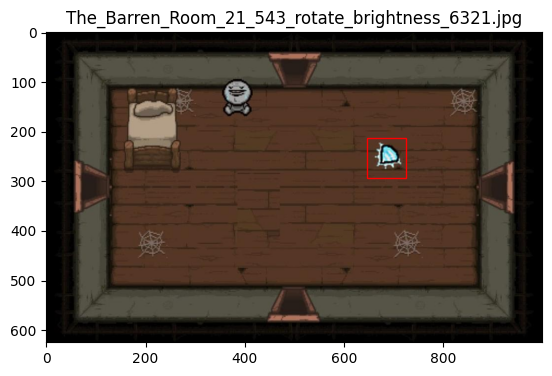

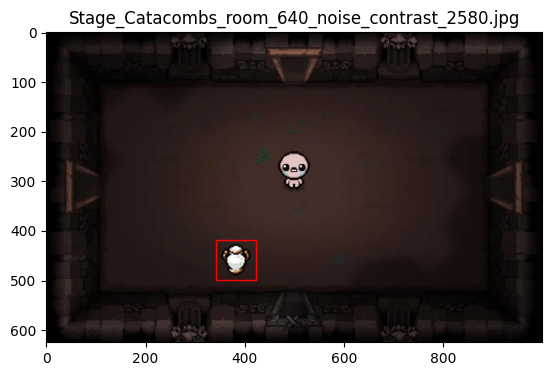

2024-08-07 23:14:35,682 [INFO] __main__: main: Step 4: Generate the YOLO dataset
2024-08-07 23:14:35,683 [INFO] isaac_yolo.isaac_yolo_dataset_generator: create_dataset_directories: Creating all directories for YOLO dataset.
2024-08-07 23:14:35,684 [INFO] isaac_yolo.isaac_yolo_dataset_generator: create_dataset_directories: Done! Created all necessary directories.
2024-08-07 23:14:35,685 [INFO] isaac_yolo.isaac_yolo_dataset_generator: get_image_label_file_pairs: Generating pairs from data\overlays...
2024-08-07 23:14:40,191 [INFO] isaac_yolo.isaac_yolo_dataset_generator: get_image_label_file_pairs: Done! Generated 117916 pairs
2024-08-07 23:14:40,192 [INFO] isaac_yolo.isaac_yolo_dataset_generator: split_dataset: Splitting dataset into train/valid/test...
2024-08-07 23:14:40,223 [INFO] isaac_yolo.isaac_yolo_dataset_generator: split_dataset: train/valid/test have respective sizes: 94332, 11791, 11793, total: 117916
2024-08-07 23:14:40,224 [INFO] isaac_yolo.isaac_yolo_dataset_generator: spl

In [2]:
# get all IsaacItem images, augment them, overlay them on each isaac background, then generate the final dataset
# when this succeeds, there will be a ~6GB yolo_isaac_dataset directory in the root of the project (one dir above this notebook)
# the filename format for the overlaid images is: {isaac_stage_name}_{IsaacItem.get_image_id_tail()}_{..augmentations applied...}_{1st 4 chars of a random uuid}.png

# NOTE: only run this cell once! If you run it multiple times it could just create way too many files
%run src/setup_everything.py

In [2]:
# we'll instantiate a YOLO model here with some specified options
model = YOLO('yolov8n.pt')

# see here on how to resume training since this will take like 40 hours
# https://docs.ultralytics.com/modes/train/#resuming-interrupted-trainings

# see https://docs.ultralytics.com/modes/train/#train-settings for options
results = model.train(
    data="data.yaml",
    pretrained=False,  # train from scratch, because I doubt a pretrained model has seen The Binding of Isaac...
    imgsz=TARGET_BACKGROUND_SIZE,
    device=0,  # run on a single GPU
    seed=SEED,
    plots=True,
    epochs=100,
    val=True,
    # batch=-,  # batch size has crashed on both 0.7 and -1 (auto mode), trying with default.
)

New https://pypi.org/project/ultralytics/8.2.78 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.72  Python-3.11.9 torch-2.4.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=(1000, 625), save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=39, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

c:\Users\hamza\anaconda3\envs\isaac_item_recognizer\Lib\site-packages\ultralytics\engine\trainer.py:269: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\hamza\Desktop\realtime-binding-of-isaac-item-detector\datasets\yolo_isaac_dataset\labels\train.cache... 94332 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94332/94332 [00:00<?, ?it/s]
val: Scanning C:\Users\hamza\Desktop\realtime-binding-of-isaac-item-detector\datasets\yolo_isaac_dataset\labels\val.cache... 11791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11791/11791 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.4G      1.285      7.139      1.257         22       1024: 100%|██████████| 5896/5896 [18:53<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [01:00<00:00,  6.08it/s]


                   all      11791      11791      0.541      0.257      0.258      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.4G      1.123      4.286      1.258         31       1024: 100%|██████████| 5896/5896 [18:16<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [01:00<00:00,  6.10it/s]


                   all      11791      11791      0.866      0.829      0.925      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.4G      1.072      1.791       1.23         30       1024: 100%|██████████| 5896/5896 [17:54<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [01:02<00:00,  5.91it/s]


                   all      11791      11791      0.939      0.924      0.974      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.4G      1.012      1.184      1.205         14       1024: 100%|██████████| 5896/5896 [18:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [01:00<00:00,  6.13it/s]


                   all      11791      11791      0.965      0.958      0.987      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.4G     0.9381      0.937      1.175         27       1024: 100%|██████████| 5896/5896 [18:09<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [01:00<00:00,  6.14it/s]


                   all      11791      11791      0.974      0.975       0.99      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.4G     0.9037     0.8376      1.163         18       1024: 100%|██████████| 5896/5896 [17:47<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [01:03<00:00,  5.81it/s]


                   all      11791      11791      0.981      0.976      0.991      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.4G       0.87     0.7714      1.149         25       1024: 100%|██████████| 5896/5896 [17:51<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [00:58<00:00,  6.33it/s]


                   all      11791      11791      0.982       0.98      0.992      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.4G     0.8475     0.7369      1.138         19       1024: 100%|██████████| 5896/5896 [17:32<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 369/369 [01:00<00:00,  6.09it/s]


                   all      11791      11791      0.985      0.981      0.992      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.4G     0.8355     0.7253      1.147         21       1024:   0%|          | 28/5896 [00:05<19:28,  5.02it/s]


KeyboardInterrupt: 